In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ada

In [ ]:
df = pd.read_csv("ht.csv", sep = ",", encoding="utf-8")
X, Y = df.drop(['target'], axis='columns').values, df['target'].values

In [ ]:
cls_tree = DecisionTreeClassifier(max_depth=5)
cls_tree.fit(df.drop(['target'], axis='columns'), df['target'])
plot_tree(cls_tree)
plt.show()

learning_rate = 0.001 n_estimators = 100


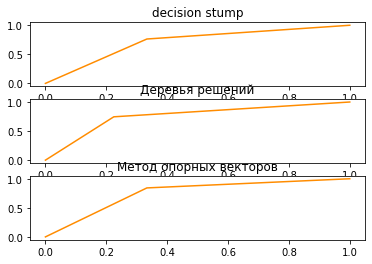

learning_rate = 0.001 n_estimators = 500


<Figure size 432x288 with 0 Axes>

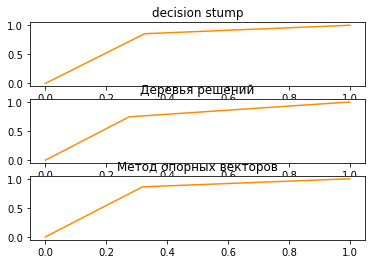

learning_rate = 0.001 n_estimators = 1000


<Figure size 432x288 with 0 Axes>

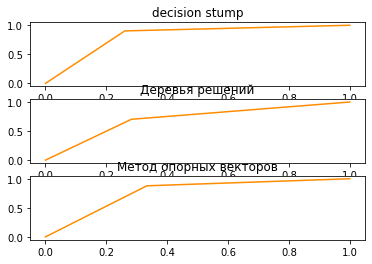

learning_rate = 0.01 n_estimators = 100


<Figure size 432x288 with 0 Axes>

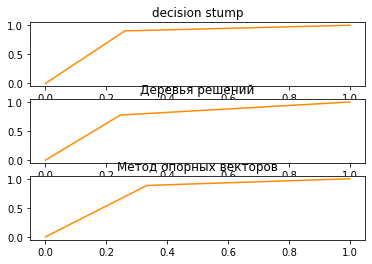

learning_rate = 0.01 n_estimators = 500


<Figure size 432x288 with 0 Axes>

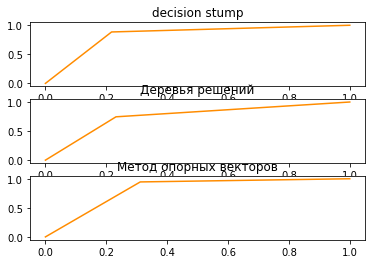

learning_rate = 0.01 n_estimators = 1000


<Figure size 432x288 with 0 Axes>

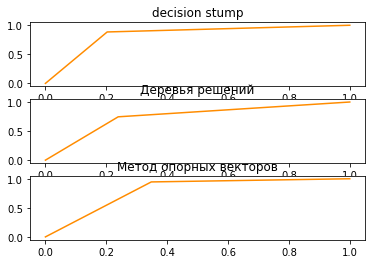

learning_rate = 0.1 n_estimators = 100


<Figure size 432x288 with 0 Axes>

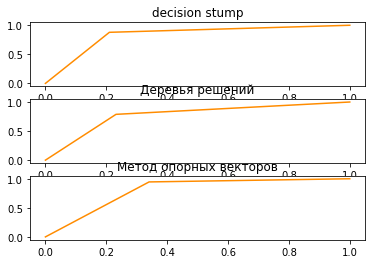

learning_rate = 0.1 n_estimators = 500


<Figure size 432x288 with 0 Axes>

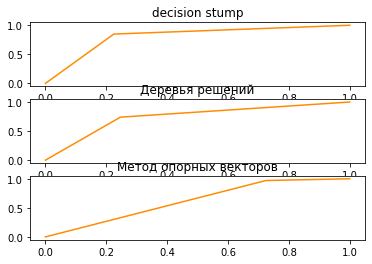

learning_rate = 0.1 n_estimators = 1000


<Figure size 432x288 with 0 Axes>

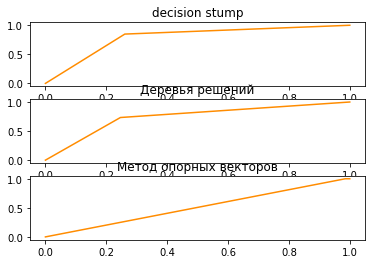

{('decision stump', 0.001, 100): 0.7151515151515153,
 ('Деревья решений', 0.001, 100): 0.7604084321475627,
 ('Метод опорных векторов', 0.001, 100): 0.7545454545454546,
 ('decision stump', 0.001, 500): 0.7642292490118576,
 ('Деревья решений', 0.001, 500): 0.7350461133069829,
 ('Метод опорных векторов', 0.001, 500): 0.7708827404479579,
 ('decision stump', 0.001, 1000): 0.8210803689064559,
 ('Деревья решений', 0.001, 1000): 0.7102108036890646,
 ('Метод опорных векторов', 0.001, 1000): 0.7727272727272729,
 ('decision stump', 0.01, 100): 0.8210803689064559,
 ('Деревья решений', 0.01, 100): 0.7646903820816866,
 ('Метод опорных векторов', 0.01, 100): 0.7757575757575759,
 ('decision stump', 0.01, 500): 0.8337285902503293,
 ('Деревья решений', 0.01, 500): 0.7567852437417655,
 ('Метод опорных векторов', 0.01, 500): 0.8169301712779973,
 ('decision stump', 0.01, 1000): 0.8409749670619235,
 ('Деревья решений', 0.01, 1000): 0.7531620553359685,
 ('Метод опорных векторов', 0.01, 1000): 0.7988142292490

<Figure size 432x288 with 0 Axes>

In [50]:
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix
est_cnt = [100, 500, 1000]
clfs = [DecisionTreeClassifier(criterion="entropy",max_depth=1),
    cls_tree,
    svm.SVC(probability=True, kernel='linear',C=1.0)]
titles = ['decision stump', 'Деревья решений', 'Метод опорных векторов']

results = dict()
learning_rates = (0.001, 0.01, 0.1)

for learning_rate in learning_rates:
    for n_estimators in est_cnt:
        fig, ax = plt.subplots(3)
        for i, base_clf, in zip(range(3), clfs):
            ada_clf = ada(base_estimator = base_clf, n_estimators = n_estimators, random_state = 42,                learning_rate=learning_rate)
            skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            actual = []
            predicted = []
            for train_index, test_index in skf.split(X, Y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = Y[train_index], Y[test_index]
                actual += (list(y_test))
                ada_clf.fit(X_train, y_train)
                y_predicted = ada_clf.predict(X=X_test)
                predicted += (list(y_predicted))
                DecisionTreeClassifier(max_depth=5)
            
            roc_score = roc_auc_score(actual, predicted)
            results.update({
                (titles[i], learning_rate, n_estimators) : roc_score
                })
            fpr, tpr, thresholds = roc_curve(actual, predicted)
            ax[i].plot(fpr, tpr, color='darkorange', label='ROC curve')
            ax[i].set_title(titles[i])
        
        print("learning_rate = " + str(learning_rate) + " n_estimators = " + str(n_estimators))
        plt.show()
        plt.clf()
results

In [80]:
min_s = {'decision stump': (0.7151515151515153,0.001, 100),
 'Деревья решений': (0.7604084321475627,0.001, 100),
 'Метод опорных векторов': (0.7545454545454546,0.001, 100)}
for key, rate, est in results:
    if min_s[key][0] < results[(key, rate, est)]:
        min_s[key] = (results[(key, rate, est)], rate, est)
min_s

{'decision stump': (0.8409749670619235, 0.01, 1000),
 'Деревья решений': (0.7779973649538867, 0.1, 100),
 'Метод опорных векторов': (0.8169301712779973, 0.01, 500)}

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
lf = ExtraTreesClassifier(n_estimators=100, random_state=0)
lf

ExtraTreesClassifier(random_state=0)

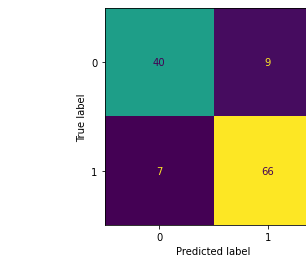

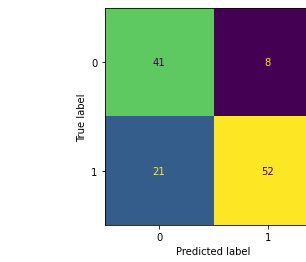

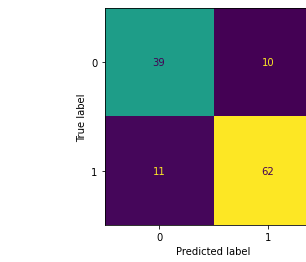

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix

ada_ds = ada(base_estimator = clfs[0], n_estimators = 1000, random_state = 42, learning_rate=0.01)
ada_tree = ada(base_estimator = clfs[1], n_estimators = 100, random_state = 42, learning_rate=0.1)
ada_svc = ada(base_estimator = clfs[2], n_estimators = 500, random_state = 42, learning_rate=0.01)


x,test,y,actual = train_test_split(df.drop(['target'], axis='columns'), df['target'], test_size=0.4)

ada_ds.fit(x,y)
ada_tree.fit(x,y)
ada_svc.fit(x,y)

plot_confusion_matrix(ada_ds,test,actual)
plot_confusion_matrix(ada_tree,test,actual)
plot_confusion_matrix(ada_svc,test,actual)

plt.show()

In [87]:
lf.fit(x,y)

ExtraTreesClassifier(random_state=0)

In [96]:
xx = df.drop(['target'], axis = 1)

print(sorted(xx.columns, key=lambda i : lf.feature_importances_[i.find(xx.columns)]))

TypeError: must be str, not Index

In [ ]:
lf.